# Homework 2

## Pair Programming Group Number: 27
## Members of Team: Yixing Ma, Daniel Lam

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from numpy.linalg import inv

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

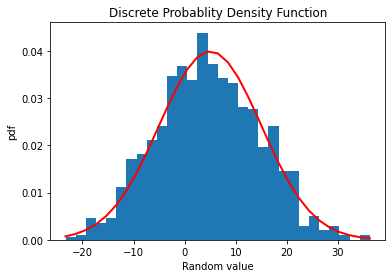

In [2]:
mu, sigma = 5, 10# mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.title('Discrete Probablity Density Function')
plt.xlabel('Random value')
plt.ylabel('pdf')
plt.show()
# Always label your axes and give your plots titles (this holds for all questions).


## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

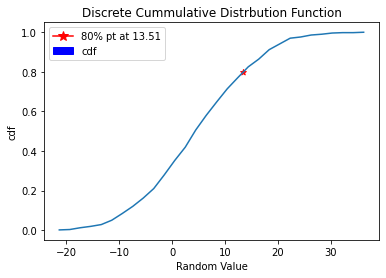

In [3]:
dx = bins[1] - bins[0]
F1 = np.cumsum(count) * dx

plt.plot(bins[1:], F1)
num = np.interp(0.8, F1, bins[1:])

plt.scatter(x = num, y = 0.8,marker = "*", c = "red")
plt.title('Discrete Cummulative Distrbution Function')
plt.xlabel('Random Value')
plt.ylabel('cdf')

red_patch = mpatches.Patch(color='blue', label='cdf')
blueline_label = '80% pt at {:0.2f}'.format(num)


blue_line = mlines.Line2D([], [], color='red', marker='*',
                          markersize=10, label= blueline_label)
plt.legend(handles=[blue_line,red_patch])

plt.show()






## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


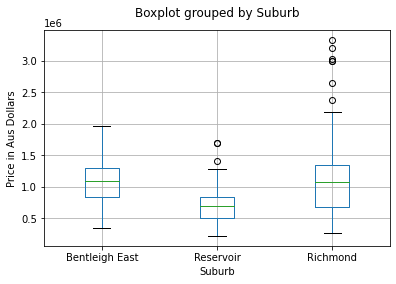

In [4]:
subs = ['Reservoir','Richmond','Bentleigh East']
threeSuburbs = df[df['Suburb'].isin(subs)]
threeSuburbs.boxplot(by = 'Suburb', column= 'Price')
plt.ylabel("Price in Aus Dollars")
plt.title("")
plt.show()


## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

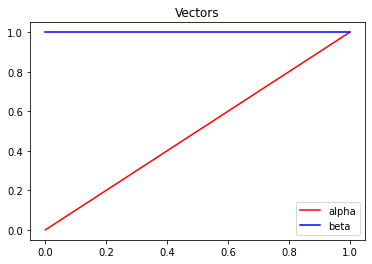

In [5]:
alpha = np.array([[0,0], [1,1]])
beta = np.array([[1,1], [0,1]])
plt.plot([0,1],[0,1], label = 'alpha', color = 'red')
plt.plot([1,0],[1,1], label = 'beta', color = 'blue')

plt.title("Vectors")
plt.legend()
plt.show()


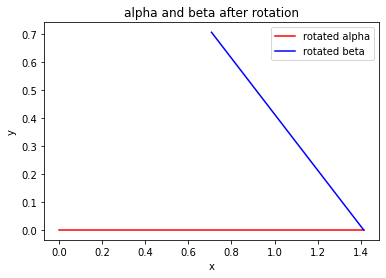

In [6]:
theta = np.radians(45)
rmatrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
ralpha = np.matmul(alpha, rmatrix)
rbeta = np.matmul(beta, rmatrix)

plt.plot([ralpha[0][0], ralpha[1][0]], [ralpha[0][1], ralpha[1][1]], label = 'rotated alpha', color = 'red')
plt.plot([rbeta[0][0], rbeta[1][0]], [rbeta[0][1], rbeta[1][1]], label = 'rotated beta', color = 'blue')

plt.title("alpha and beta after rotation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [7]:
m = np.matrix([[2,1,1],[4,-6,0],[-2,7,2]])
b = np.array([[5],[-2],[9]])
minv = inv(m)
answer =np.matmul(minv, b)
print(answer)

[[1.]
 [1.]
 [2.]]
